<a href="https://colab.research.google.com/github/Glebych2/MIPT_home_work/blob/main/Environment_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q -U kaggle_environments

     |████████████████████████████████| 1.9 MB 2.1 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns

from kaggle_environments import make, evaluate


In [3]:
%%writefile utils.py

import math


def get_score(left_move, right_move):
    # This method exists in this file so it can be consumed from rps.py and agents.py without a circular dependency
    delta = (
        right_move - left_move
        if (left_move + right_move) % 2 == 0
        else left_move - right_move
    )
    return 0 if delta == 0 else math.copysign(1, delta)

Writing utils.py


Опишем поведение агента, всегда играющего "камень" - это значение 0

In [4]:
%%writefile rock_agent.py
#Example of the simple agent
#0 - rock
#1 - paper
#2 - scissors
def your_agent(observation, configuration):
    return 0

Writing rock_agent.py


Попробуем теперь использовать информацию о прошлых действиях противника. Опишем агента, который производит то же самое действие, что и оппонент на прошлом ходу

In [5]:
%%writefile copy_opponent.py
import random
#Example 
def copy_opponent(observation, configuration):   
    #in case we have information about opponent last move
    if observation.step > 0:
        return observation.lastOpponentAction
    #initial step
    else:
        return random.randrange(0, configuration.signs)
        #return random.randrange(0, 2)

Writing copy_opponent.py


Опишем поведение агента, всегда играющего "бумага" - это значение 1

In [6]:
%%writefile paper_agent.py
#Example of the simple agent
#0 - rock
#1 - paper
#2 - scissors
def your_agent(observation, configuration):
    return 1

Writing paper_agent.py


Опишем поведение агента, всегда играющего "ножницы" - это значение 2

In [7]:
%%writefile scissors_agent.py
#Example of the simple agent
#0 - rock
#1 - paper
#2 - scissors
def your_agent(observation, configuration):
    return 2

Writing scissors_agent.py


In [8]:
%%writefile submission.py

import random

def nash_equilibrium_agent(observation, configuration):
    return random.randint(0, 2)

Writing submission.py


In [9]:
%%writefile submission2.py

import random

def nash_equilibrium_agent(observation, configuration):
    return random.randint(1, 2)

Writing submission2.py


In [10]:
%%writefile submission3.py

import random

def nash_equilibrium_agent(observation, configuration):
    return random.randint(0, 1)

Writing submission3.py


In [11]:
%%writefile reactionary.py
import random
from utils import get_score

last_react_action = None
def reactionary(observation, configuration):
    global last_react_action
    if observation.step == 0:
        last_react_action = random.randrange(0, configuration.signs)
    elif get_score(last_react_action, observation.lastOpponentAction) <= 1:
        last_react_action = (observation.lastOpponentAction + 1) % configuration.signs

    return last_react_action


Writing reactionary.py


In [12]:
%%writefile counter_reactionary.py
import random
from utils import get_score

last_counter_action = None
def counter_reactionary(observation, configuration):
    global last_counter_action
    if observation.step == 0:
        last_counter_action = random.randrange(0, configuration.signs)
    elif get_score(last_counter_action, observation.lastOpponentAction) == 1:
        last_counter_action = (last_counter_action + 2) % configuration.signs
    else:
        last_counter_action = (observation.lastOpponentAction + 1) % configuration.signs

    return last_counter_action

Writing counter_reactionary.py


In [13]:
%%writefile statistical.py
import random
from utils import get_score 

def statistical(observation, configuration):
    global action_histogram
    if observation.step == 0:
        action_histogram = {}
        return
    action = observation.lastOpponentAction
    if action not in action_histogram:
        action_histogram[action] = 0
    action_histogram[action] += 1
    mode_action = None
    mode_action_count = None
    for k, v in action_histogram.items():
        if mode_action_count is None or v > mode_action_count:
            mode_action = k
            mode_action_count = v
            continue

    return (mode_action + 1) % configuration.signs

Writing statistical.py


In [14]:
%%writefile repeat_agent.py
import random
from utils import get_score

last_react_action = None
def repeat(observation, configuration):
    global last_react_action
    if observation.step == 0:
        last_react_action = random.randrange(0, 2)
    elif get_score(last_react_action, observation.lastOpponentAction) <= 1:
        last_react_action = (observation.lastOpponentAction + 1) % configuration.signs

    return last_react_action


Writing repeat_agent.py


In [35]:
%%writefile repeat2_agent.py
import random
from utils import get_score

last_react_action = None
def repeat2(observation, configuration):
    global last_react_action
    if observation.step == 0:
        last_react_action = random.randrange(1, 2)
    elif get_score(last_react_action, observation.lastOpponentAction) <= 1:
        last_react_action = (observation.lastOpponentAction + 1) % configuration.signs

    return last_react_action


Overwriting repeat2_agent.py


In [67]:
%%writefile my_agent.py
import random
from utils import get_score

last_react_action = None
def my_agent(observation, configuration):
    global last_react_action
    if observation.step == 0:
        last_react_action = 2
    elif get_score(last_react_action, observation.lastOpponentAction) == 1:
        last_react_action = (observation.lastOpponentAction + 1) % configuration.signs
    elif get_score(last_react_action, observation.lastOpponentAction) == 2:
        last_react_action = (observation.lastOpponentAction + 1) % configuration.signs
    return last_react_action


Overwriting my_agent.py


Воспользуемся функцией evaluate из библиотеки kaggle_environments с помощью которой запустим наших агентов и проведем эксперимент на заданном количестве игр

In [29]:
lst = ["submission.py", "submission2.py", "submission3.py", "copy_opponent.py", "scissors_agent.py", "counter_reactionary.py", 
       "reactionary.py", "paper_agent.py", "rock_agent.py", "statistical.py", "repeat_agent.py", "my_agent.py"]
#lst = ["submission", "copy_opponent", "scissors_agent", "counter_reactionary", "reactionary", "paper_agent", "rock_agent"]

In [70]:
dict_win = {"submission.py": [0, 0, 0], "submission2.py": [0, 0, 0], "submission3.py":[0, 0, 0],"copy_opponent.py": [0, 0, 0], "scissors_agent.py": [0, 0, 0],
        "counter_reactionary.py": [0, 0, 0], "reactionary.py": [0, 0, 0], "paper_agent.py": [0, 0, 0], "rock_agent.py": [0, 0, 0],
         "statistical.py": [0, 0, 0], "repeat_agent.py": [0, 0, 0], "my_agent.py": [0, 0, 0]}

np.rps = []
for i in range(len(lst)):
  np.rps_row = []
  a = 0
  for j in range(len(lst)):
    one_set = []
    one_set = evaluate(
      "rps", #environment to use - no need to change
      [lst[i], lst[j]], #agents to evaluate
      configuration={"episodeSteps": 10, 'tieRewardThreshold': 1} #number of episodes 
    )
    np.rps_row += one_set
    #print(one_set)
    if one_set[0][0] > one_set[0][1]:
      dict_win[lst[i]][0] += 1
    elif one_set[0][0] < one_set[0][1]:
      dict_win[lst[i]][1] += 1
    else:
      dict_win[lst[i]][2] += 1
    
  np.rps.append(np.rps_row)

In [71]:
colName = ["Побед", "Поражний", "Ничьих"]
df = pd.DataFrame.from_dict(dict_win, orient='index', columns=colName)
df = df.sort_values("Побед",ascending = False)
df

,Побед,Поражний,Ничьих
reactionary.py,10,0,2
counter_reactionary.py,8,3,1
repeat_agent.py,8,1,3
statistical.py,7,4,1
submission.py,6,4,2
copy_opponent.py,5,4,3
submission2.py,4,6,2
scissors_agent.py,4,5,3
my_agent.py,4,5,3
submission3.py,3,6,3


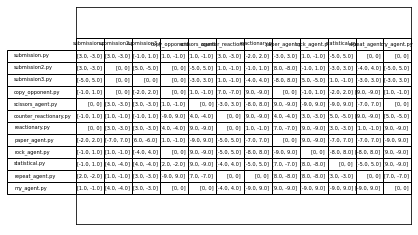

<Figure size 2880x2880 with 0 Axes>

In [72]:
from operator import index
import seaborn as sns

fig, ax = plt.subplots()

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
# Table from Ed Smith answer
clust_data = np.rps
collabel=(lst)
rowlabel=(lst)

the_table = ax.table(cellText=clust_data,colLabels=collabel, rowLabels=rowlabel, loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(5)
plt.figure(figsize=(40, 40))
plt.show()

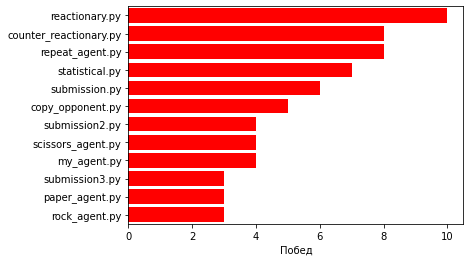

In [73]:
df1 = df
for i in df1.index:
    df1["Агент"] = df1.index

sns.barplot(
    x='Побед', 
    y=df1.index, 
    #hue="Побед",
    ci=90,
    color='Red',
    saturation=1,
    dodge= False, 
    data=df1
)

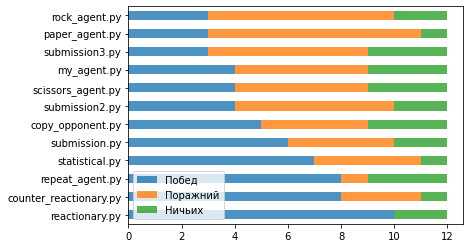

In [74]:
df1.plot.barh(stacked=True, alpha=0.8)